In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

import os
print(os.listdir("../input"))
sns.set(style='whitegrid')
# Any results you write to the current directory are saved as output.

['database.sqlite', 'Iris.csv']


**Import the Iris.csv as pandas dataframe** 

In [2]:
df = pd.read_csv('../input/Iris.csv')

**Lets see 1st five rows of the dataframe using head method**

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**We have four different features of Iris flower namely Sepal-Length, Sepal-Width, Petal-length, Petal-Width. All values are given in cm scale. Each row of the dataframe has an Id of the flower, values for the features and flower species associated with it.** 

Now, lets see some statistics about the dataframe using describe method

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Lets see distribution of each features**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


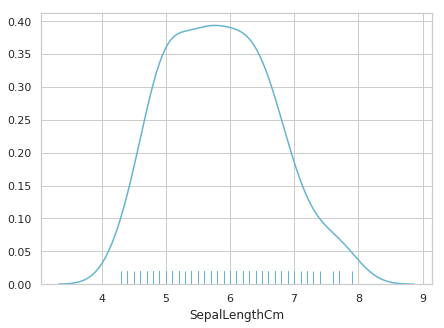

In [5]:
#distribution for speal-length
plt.subplots(figsize=(7,5))
sns.distplot(df['SepalLengthCm'], hist=False, rug=True, color='c')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


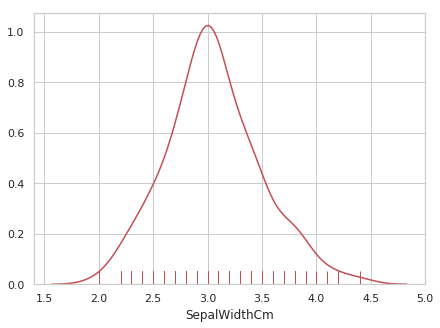

In [6]:
#distribution of sepal-width
plt.subplots(figsize=(7,5))
sns.distplot(df['SepalWidthCm'], hist=False, rug=True, color='r')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


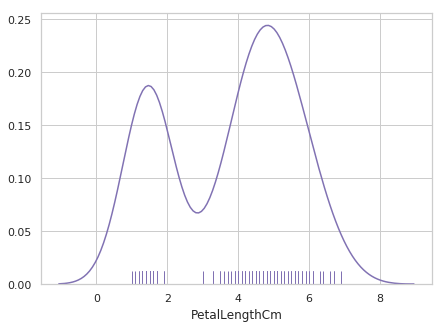

In [7]:
#distribution of petal-length
plt.subplots(figsize=(7,5))
sns.distplot(df['PetalLengthCm'], hist=False, rug=True, color='m')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


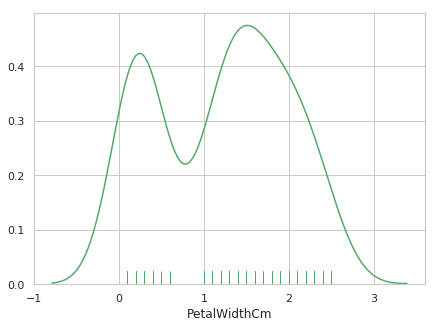

In [8]:
#distribution of petal-width
plt.subplots(figsize=(7,5))
sns.distplot(df['PetalWidthCm'], hist=False, rug=True, color='g')

In [9]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**From this we can see that we have equal no. of example for different species**

In [10]:
df['Species'] = df['Species'].map({'Iris-versicolor': 'versicolor', 'Iris-virginica':'virginica', 'Iris-setosa':'setosa'})
#mapped the species from Iris-x to x, not needed but I did it anyway

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


**Here the idea is to split the dataframe into three depending upon the Iris species. Visualize the distribution different species using spela-length-vs-sepal-width and petal-length-vs-petal-width** 

In [12]:
setosa = df[df['Species'] == 'setosa']            #make a dataframe setosa from df where species is setosa
virginica = df[df['Species'] == 'virginica']      #make a dataframe virginica from df where species is virginica
versicolor = df[df['Species'] == 'versicolor']    #make a dataframe versicolor from df where species is versicolor

### Sepal-Width vs Sepal-Length

**Color used**
* setosa --> Blue
* versicolor --> cyan
* virginica --> magenta

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Setosa')

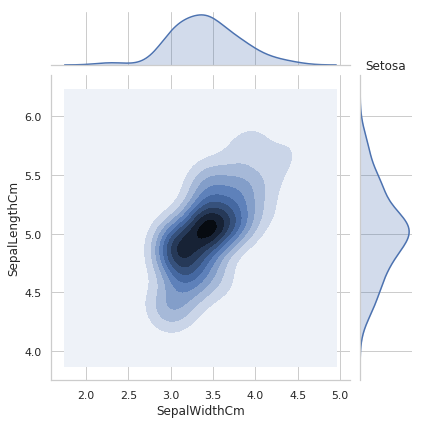

In [13]:
sns.jointplot(setosa['SepalWidthCm'], setosa['SepalLengthCm'], kind='kde', color='b')
plt.title('Setosa')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Versicolor')

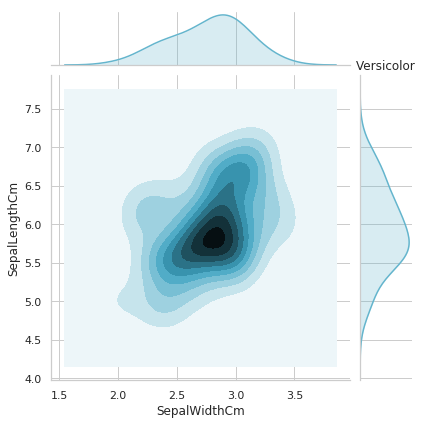

In [14]:
sns.jointplot(versicolor['SepalWidthCm'], versicolor['SepalLengthCm'], kind='kde', color='c')
plt.title('Versicolor')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Virginica')

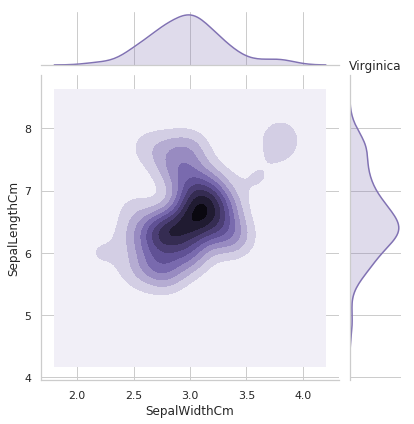

In [15]:
sns.jointplot(virginica['SepalWidthCm'], virginica['SepalLengthCm'], kind='kde', color='m')
plt.title('Virginica')

### Petal-Width vs Petal-Length

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'setosa')

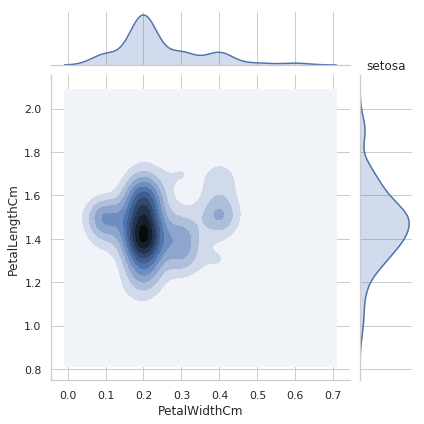

In [16]:
sns.jointplot(setosa['PetalWidthCm'], setosa['PetalLengthCm'], kind='kde', color='b')
plt.title('setosa')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'versicolor')

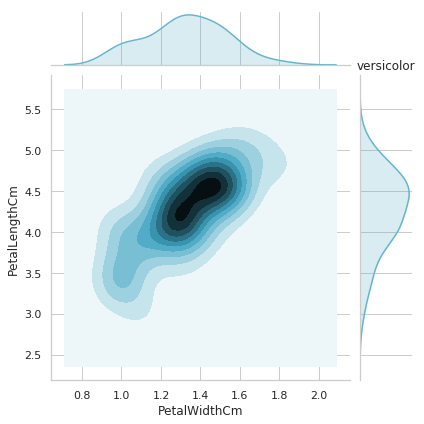

In [17]:
sns.jointplot(versicolor['PetalWidthCm'], versicolor['PetalLengthCm'], kind='kde', color='c')
plt.title('versicolor')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'virginica')

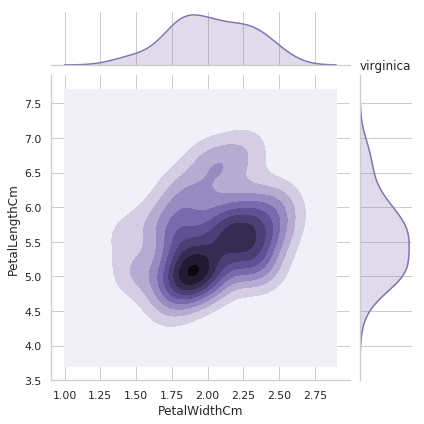

In [18]:
sns.jointplot(virginica['PetalWidthCm'], virginica['PetalLengthCm'], kind='kde', color='m')
plt.title('virginica')

**Lets use a pairplot to visualize how different species of iris flower is scattered **

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


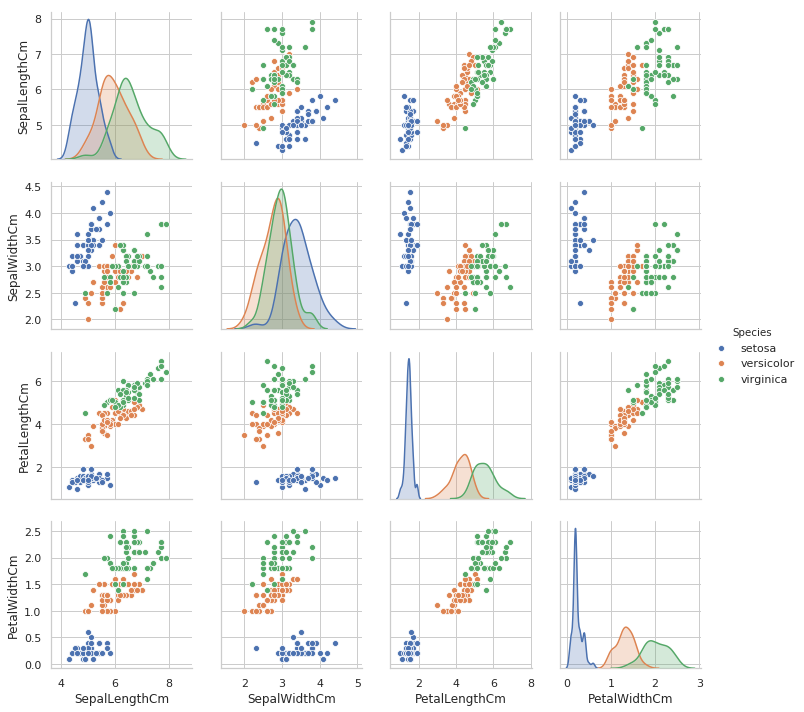

In [19]:
df.drop(columns=['Id'], inplace=True) #dropping id column beacuse it's not needed for pairplot and for future analysis
sns.pairplot(df, hue='Species')       #hue is species because we want see the species' distribution

**I want to pedict a species of iris-flower given value of it's features. This is a classification problem because our target is discrete variable only having 3 different values(multiple classes).**   

**Here I will use dirrent classifier for this problem namely Logistic Regression, SVM(suport vector machine) and Decision Tree classifier. Lets see how these classifiers work for this dataset.** But 1st split the dataframe for training and test purpose.

In [20]:
#splitting the data 80-20 for training and test 
train, test = train_test_split(df, test_size=0.2)

In [21]:
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [22]:
X_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = train['Species']

X_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test['Species']

In [23]:
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
76             6.8           2.8            4.8           1.4
127            6.1           3.0            4.9           1.8
36             5.5           3.5            1.3           0.2
46             5.1           3.8            1.6           0.2
55             5.7           2.8            4.5           1.3
76     versicolor
127     virginica
36         setosa
46         setosa
55     versicolor
Name: Species, dtype: object
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
144            6.7           3.3            5.7           2.5
89             5.5           2.5            4.0           1.3
139            6.9           3.1            5.4           2.1
57             4.9           2.4            3.3           1.0
130            7.4           2.8            6.1           1.9
144     virginica
89     versicolor
139     virginica
57     versicolor
130     virginica
Name: Species, dtype: object


**Logistic Regression**

In [24]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print('Accuracy of this model is :', metrics.accuracy_score(prediction1, y_test))

Accuracy of this model is : 0.9666666666666667


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**SVM**

In [25]:
model2 = svm.SVC()
model2.fit(X_train, y_train)
prediction2 = model2.predict(X_test)

print('Accuracy of SVM model is :', metrics.accuracy_score(prediction2, y_test))

Accuracy of SVM model is : 1.0


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Decision Tree **

In [26]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
prediction3 = model3.predict(X_test)

print('Acuracy of Decision Tree model is :', metrics.accuracy_score(prediction3, y_test))

Acuracy of Decision Tree model is : 0.9


## Conclusion
From this we can see that svm is performing extremely good for this classification problem.